# Latar Belakang

## Gambaran Industri Taksi di New York City

New York City (NYC) merupakan salah satu pusat aktivitas ekonomi dan mobilitas terbesar di dunia dengan lebih dari 8 juta penduduk dan jutaan turis setiap tahunnya. Industri taksi menjadi tulang punggung transportasi publik yang melayani ratusan ribu perjalanan per hari, melengkapi sistem subway dan bus dalam memenuhi kebutuhan mobilitas warga dan pengunjung kota.

NYC Taxi & Limousine Commission (TLC) adalah badan regulasi yang mengawasi industri taksi, termasuk Yellow Taxi, Green Taxi (Boro Taxi), dan layanan for-hire vehicles. Green Taxi khususnya diluncurkan pada 2013 untuk melayani area di luar Manhattan (outer boroughs dan Upper Manhattan) yang sebelumnya kurang terlayani oleh Yellow Taxi.

## Proses Bisnis Green Taxi

Operasi Green Taxi melibatkan beberapa komponen utama:

1. **Demand & Supply Management**: Penempatan armada berdasarkan pola permintaan (waktu, lokasi, demografi)
2. **Trip Execution**: Proses pickup hingga dropoff dengan pencatatan otomatis via meter dan GPS
3. **Revenue Collection**: Pembayaran melalui berbagai metode (kartu kredit, tunai, digital payment)
4. **Data Recording**: Setiap trip tercatat lengkap (waktu, lokasi, jarak, tarif, metode pembayaran, dll) dalam sistem TLC
5. **Operational Analytics**: Data trip digunakan untuk evaluasi kinerja dan optimasi operasional

## Urgensi

Industri taksi NYC menghadapi persaingan ketat dari ride-hailing apps (Uber, Lyft) yang memanfaatkan data analytics untuk:
- Optimasi dynamic pricing
- Penempatan armada real-time
- Personalisasi layanan pelanggan

Tanpa pemanfaatan data secara optimal, operator taksi tradisional **kehilangan pangsa pasar** dan **efisiensi operasional menurun**. TLC telah merilis data historis trip records sebagai sumber daya publik, namun banyak operator belum memaksimalkan insights dari data ini untuk pengambilan keputusan strategis.

## Permasalahan

Operator Green Taxi saat ini menghadapi tantangan:

1. **Demand Inefficiency**: Ketidakseimbangan supply-demand di berbagai zona dan waktu, menyebabkan idle time tinggi dan lost revenue
2. **Revenue Leakage**: Kurangnya pemahaman terhadap komponen pendapatan (fare, tip, toll) dan faktor yang mempengaruhinya
3. **Operational Blind Spots**: Minimnya visibilitas terhadap metrik efisiensi (durasi trip, kecepatan, utilisasi armada)
4. **Untapped Opportunities**: Potensi revenue dari segmen tertentu (bandara, corporate, weekend) belum dioptimalkan

## Goals

Analisis ini bertujuan menghasilkan **actionable insights berbasis data** untuk:

1. **Meningkatkan Revenue**: Identifikasi zona dan waktu ber-revenue tinggi untuk strategi pricing dan penempatan armada
2. **Optimasi Operasional**: Benchmark metrik efisiensi dan identifikasi area improvement
3. **Demand Forecasting**: Memahami pola permintaan untuk perencanaan kapasitas dan shift scheduling
4. **Customer Experience**: Analisis perilaku pembayaran dan tip untuk strategi retention
5. **Strategic Planning**: Rekomendasi ekspansi layanan (airport premium, weekend promo, cashless incentive)

**Expected Outcome**: Operator dapat mengambil keputusan berbasis data yang menghasilkan peningkatan revenue 8-15%, efisiensi operasional 20%, dan kepuasan pelanggan yang lebih baik dalam 6-12 bulan implementasi.

---

# Pernyataan Masalah

Sebagai **Data Analyst untuk operator Green Taxi NYC**, kita perlu menjawab pertanyaan bisnis kritis berikut:

## 1. **DEMAND ANALYSIS** | Kapan dan di mana demand tertinggi?
   - Bagaimana pola permintaan per jam dalam sehari?
   - Apakah ada perbedaan signifikan demand weekday vs weekend?
   - Zona pickup mana yang paling sibuk?
   
   **→ Tujuan**: Optimasi penempatan armada dan shift scheduling

## 2. **REVENUE ANALYSIS** | Dari mana revenue terbesar berasal?
   - Berapa kontribusi masing-masing komponen (fare, tip, toll) terhadap total revenue?
   - Zona mana yang menghasilkan revenue per trip tertinggi?
   - Bagaimana karakteristik trip yang menghasilkan revenue tinggi?
   
   **→ Tujuan**: Strategi pricing dan fokus zona prioritas

## 3. **OPERATIONAL EFFICIENCY** | Seberapa efisien operasi saat ini?
   - Berapa rata-rata durasi trip dan kecepatan perjalanan?
   - Bagaimana distribusi jumlah penumpang per trip?
   - Apakah ada anomali operasional yang perlu dibenahi?
   
   **→ Tujuan**: Benchmark KPI dan identifikasi bottleneck

## 4. **PAYMENT BEHAVIOR** | Bagaimana perilaku pembayaran mempengaruhi revenue?
   - Berapa proporsi pembayaran kartu vs tunai?
   - Metode pembayaran mana yang menghasilkan tip lebih tinggi?
   - Bagaimana hubungan payment type dengan nilai transaksi?
   
   **→ Tujuan**: Strategi cashless adoption dan tip optimization

## 5. **AIRPORT & PREMIUM SEGMENT** | Apakah rute bandara profitable?
   - Berapa proporsi trip bandara (JFK/Newark) dari total trip?
   - Bagaimana perbandingan revenue, durasi, dan jarak airport vs non-airport?
   - Apakah ada opportunity untuk premium service khusus bandara?
   
   **→ Tujuan**: Evaluasi kelayakan layanan premium dan ekspansi segmen

---

**Deliverable**: Dashboard insights, rekomendasi strategis, dan roadmap implementasi untuk meningkatkan profitabilitas dan efisiensi operasional Green Taxi NYC.

## Data
- Sumber: NYC TLC Green Taxi (LPEP) Trip Records.
- Unit analisis: per perjalanan (row = satu trip).
- Fitur inti: waktu pickup/dropoff, jarak, jumlah penumpang, komponen tarif (fare, mta_tax, improvement_surcharge, tolls, tip), total_amount, lokasi pickup/dropoff (Taxi Zone), rate code, payment type.

Data pada notebook ini diambil dari file CSV yang telah diunggah ke Google Drive dan diunduh via gdown. Setelah pemuatan, nama kolom dinormalisasi ke snake_case agar konsisten lintas skema TLC.

## Metodologi Singkat
1) Normalisasi skema: deteksi nama kolom lintas variasi TLC (lpep/tpep) secara dinamis.  
2) Casting & fitur turunan: konversi tipe datetime/numerik; hitung durasi dan kecepatan rata-rata.  
3) Imputasi data hilang: pemilihan mean vs median berbasis uji normalitas (D'Agostino–Pearson) per kolom.  
4) Pembersihan anomali: aturan bisnis untuk durasi tidak logis, jarak/kecepatan mustahil, dan nilai biaya negatif.  
5) Validasi tarif: flag inkonsistensi penjumlahan komponen terhadap total_amount (tidak di-drop).  
6) Feature engineering: ekstraksi jam/hari, label rate code dan payment type.  
7) Analisis deskriptif: Demand, Revenue, Operations, Payment Behavior, dan Rate/Airport dengan visualisasi.

In [ ]:
!pip  install gdown

import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest, ttest_ind, mannwhitneyu, pearsonr
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# style untuk visualisasi
plt.style.use('seaborn-v0_8')

# pallet warna konsisten
COLORS = {
    'primary': '#2E86AB',      
    'secondary': '#A23B72',    
    'accent1': '#F18F01',      
    'accent2': '#C73E1D',      
    'success': '#5FB3D4',      
    'info': '#86A3B8',        
    'weekday': '#2E86AB',      
    'weekend': '#A23B72',      
    'chart_palette': ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#5FB3D4', '#86A3B8']
}

sns.set_palette(COLORS['chart_palette'])

# Load dataset dari Google Drive
file_id = "1NYZJYi8n6Vc2Hso2_g_9Fut9M1QrkGjP"
url = f"https://drive.google.com/uc?id={file_id}"
output = "data.csv"
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)

def normalize_columns(cols):
    return [c.strip().lower().replace(" ", "_") for c in cols]

df.columns = normalize_columns(df.columns.tolist())
df.head()

Downloading...
From: https://drive.google.com/uc?id=1NYZJYi8n6Vc2Hso2_g_9Fut9M1QrkGjP
To: d:\Purwadhika\SQL and Py\Capstone Project\data.csv
100%|██████████| 7.33M/7.33M [00:00<00:00, 9.19MB/s]



,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


# Data Understanding & Cleaning
Bagian ini fokus pada **pemahaman struktur data** dan **pembersihan data** untuk memastikan kualitas analisis. Proses mencakup:
1. Deteksi otomatis kolom untuk menangani variasi skema TLC
2. Konversi tipe data dan pembuatan fitur turunan
3. Imputasi cerdas berbasis uji statistik
4. Pembersihan anomali berdasarkan aturan bisnis
5. Validasi konsistensi komponen tarif

**Target Outcome**: Dataset bersih dengan minimal 95% data valid, 0% missing values, dan siap untuk analisis mendalam.


## Deteksi nama kolom (tahan variasi skema TLC)

In [33]:
def find_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

col_pickup  = find_col(df, ["lpep_pickup_datetime","tpep_pickup_datetime","pickup_datetime"])
col_dropoff = find_col(df, ["lpep_dropoff_datetime","tpep_dropoff_datetime","dropoff_datetime"])
col_dist    = find_col(df, ["trip_distance","distance"])
col_pass    = find_col(df, ["passenger_count","passenger_cnt"])
col_fare    = find_col(df, ["fare_amount","fare"])
col_mta     = find_col(df, ["mta_tax","mta"])
col_impr    = find_col(df, ["improvement_surcharge","improvement_surch"])
col_tolls   = find_col(df, ["tolls_amount","tolls"])
col_tip     = find_col(df, ["tip_amount","tip"])
col_total   = find_col(df, ["total_amount","total"])

### **Apa yang Dikerjakan?**
Membuat fungsi `find_col()` yang secara dinamis mendeteksi nama kolom yang bervariasi antar dataset TLC (Green Taxi menggunakan "lpep_", Yellow Taxi menggunakan "tpep_", atau versi singkat lainnya).

### **Untuk Apa?**
- **Fleksibilitas**: Notebook dapat digunakan untuk berbagai dataset TLC (Green/Yellow Taxi) tanpa modifikasi manual
- **Robustness**: Menghindari error `KeyError` jika nama kolom berubah di versi dataset baru
- **Maintainability**: Satu kode untuk semua variasi skema, mudah di-maintain
- **Scalability**: Mudah ditambahkan kandidat kolom baru jika skema berubah

### **Output yang Diharapkan?**
**10 variabel kolom** ter-mapping otomatis:
- **Waktu**: `col_pickup`, `col_dropoff` 
- **Trip metrics**: `col_dist`, `col_pass`
- **Revenue components**: `col_fare`, `col_mta`, `col_impr`, `col_tolls`, `col_tip`, `col_total`

**Contoh mapping**:
```
col_pickup  → "lpep_pickup_datetime"
col_fare    → "fare_amount"
col_total   → "total_amount"
```

## Casting tipe data & fitur turunan dasar

In [34]:
# Datetime
for c in [col_pickup, col_dropoff]:
    if c is not None:
        df[c] = pd.to_datetime(df[c], errors="coerce")

# Numerik
for c in [col_dist, col_pass, col_fare, col_mta, col_impr, col_tolls, col_tip, col_total]:
    if c is not None and c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Fitur durasi & kecepatan rata-rata
if (col_pickup is not None) and (col_dropoff is not None):
    df["trip_duration_minutes"] = (df[col_dropoff] - df[col_pickup]).dt.total_seconds()/60.0
    df["trip_duration_hours"]   = df["trip_duration_minutes"]/60.0
else:
    df["trip_duration_minutes"] = np.nan
    df["trip_duration_hours"]   = np.nan

if col_dist is not None:
    df["avg_speed_mph"] = np.where(df["trip_duration_hours"]>0,
                                   df[col_dist]/df["trip_duration_hours"], np.nan)
else:
    df["avg_speed_mph"] = np.nan


### **Apa yang Dikerjakan?**
Mengkonversi kolom ke tipe data yang tepat (datetime, numeric) dan membuat fitur baru untuk analisis operasional:
- **Datetime conversion**: `pickup_datetime`, `dropoff_datetime`
- **Numeric conversion**: Semua kolom tarif dan metrik
- **Feature engineering**: 
  - `trip_duration_minutes` = waktu tempuh (menit)
  - `trip_duration_hours` = waktu tempuh (jam)
  - `avg_speed_mph` = kecepatan rata-rata (miles per hour)

### **Untuk Apa?**
- **Konsistensi**: Memastikan semua kolom numerik/datetime dalam format yang benar untuk operasi matematis
- **Error Handling**: `errors="coerce"` mengubah nilai invalid menjadi `NaN` untuk di-handle di tahap imputasi
- **Feature Engineering**: Membuat metrik operasional penting yang **tidak tersedia** di data mentah:
  - Durasi trip → untuk analisis efisiensi waktu
  - Kecepatan rata-rata → untuk deteksi anomali & analisis lalu lintas
- **Analisis Mendalam**: Fitur turunan ini jadi basis untuk analisis operational efficiency

### **Output yang Diharapkan?**
**2 fitur baru**:
- `trip_duration_minutes`: Durasi perjalanan dalam menit
- `avg_speed_mph`: Kecepatan rata-rata dalam mph

**Semua kolom dalam tipe data yang benar**:
```python
pickup_datetime    → datetime64[ns]
fare_amount        → float64
trip_distance      → float64
```

**Invalid values → NaN** (akan di-handle di tahap imputasi)

## Uji normalitas → pilih MEAN atau MEDIAN (p-value dari normaltest)

In [35]:
def choose_imputer(series, alpha=0.05, sample_cap=100_000):
    """Return dict: {'method': 'mean'/'median', 'p_value': float, 'stat': float}"""
    x = series.dropna().values
    if x.size == 0:
        return {"method":"median", "p_value": np.nan, "stat": np.nan}  # default aman
    # sampling bila terlalu besar
    if x.size > sample_cap:
        rng = np.random.default_rng(42)
        x = rng.choice(x, size=sample_cap, replace=False)
    # kalau data terlalu kecil/variasi nol → median
    if len(x) < 8 or np.nanstd(x) == 0:
        return {"method":"median", "p_value": np.nan, "stat": np.nan}
    stat, p = stats.normaltest(x)  # D’Agostino–Pearson
    return {"method": ("mean" if p >= alpha else "median"), "p_value": float(p), "stat": float(stat)}


### **Apa yang Dikerjakan?**
Menggunakan **D'Agostino-Pearson test** (`scipy.stats.normaltest`) untuk menguji normalitas distribusi setiap kolom numerik, lalu **memilih metode imputasi terbaik**:
- Jika **p-value ≥ 0.05** → distribusi **normal** → gunakan **MEAN**
- Jika **p-value < 0.05** → distribusi **skewed** → gunakan **MEDIAN**

### **Untuk Apa?**
- **Imputasi Cerdas**: Metode imputasi dipilih berdasarkan **justifikasi statistik**, bukan asumsi subjektif:
  - **MEAN** cocok untuk data normal (representatif untuk nilai tengah)
  - **MEDIAN** tahan terhadap outlier pada data skewed (tidak terdistorsi oleh nilai ekstrem)
- **Dokumentasi**: Setiap keputusan tercatat dengan p-value untuk audit & transparency
- **Minimalisasi Bias**: Hindari distorsi statistik akibat metode imputasi yang salah
- **Reproducibility**: Keputusan dapat diverifikasi & dijelaskan ke stakeholder

### **Output yang Diharapkan?**
**Tabel keputusan imputasi** dengan justifikasi statistik:

| Kolom                    | Method | P-Value   | Interpretasi              |
|--------------------------|--------|-----------|---------------------------|
| `passenger_count`        | median | 0.0000    | Distribusi sangat skewed  |
| `trip_distance`          | median | 0.0000    | Ada outlier ekstrem       |
| `fare_amount`            | median | 0.0000    | Right-skewed              |
| `trip_duration_minutes`  | median | 0.0000    | Mayoritas trip pendek     |
| `avg_speed_mph`          | median | 0.0000    | Kecepatan sangat bervariasi|

**Insight**: Hampir **semua metrik operasional** bersifat **right-skewed** (mayoritas nilai kecil, beberapa nilai ekstrem) → **MEDIAN lebih aman** daripada mean untuk imputasi.


## Daftar kolom yang akan diimputasi + aturan nilai 0 by domain

In [36]:
# Kolom yang wajar diisi 0 jika NaN (berdasarkan proses)
always_zero_if_nan = [col_tolls, col_tip]  # tip tunai tak tercatat; NaN → 0 aman

# Kolom yang ditentukan via normaltest
impute_targets = [
    col_pass, col_dist, col_fare, col_mta, col_impr, col_total,
    "trip_duration_minutes", "avg_speed_mph"
]
impute_targets = [c for c in impute_targets if (c is not None and c in df.columns)]
impute_targets


['passenger_count',
 'trip_distance',
 'fare_amount',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'trip_duration_minutes',
 'avg_speed_mph']

### **Apa yang Dikerjakan?**
Mengelompokkan kolom berdasarkan **strategi imputasi**:
1. **Kolom yang diisi 0** (berdasarkan domain bisnis):
   - `tolls_amount`: NaN = tidak ada tol → isi 0
   - `tip_amount`: NaN = tip tunai (tidak tercatat di sistem) → isi 0
   
2. **Kolom yang diimputasi statistik** (mean/median berdasarkan normaltest):
   - `passenger_count`, `trip_distance`, `fare_amount`, `mta_tax`, `improvement_surcharge`, `total_amount`, `trip_duration_minutes`, `avg_speed_mph`

### **Untuk Apa?**
- **Preservasi Makna Bisnis**: 
  - `tip_amount = NaN` **bukan** missing data → tapi tip tunai yang memang **tidak tercatat** di sistem → **logis diisi 0**
  - `tolls_amount = NaN` → trip tidak melewati tol → **logis diisi 0**
- **Pemisahan Logika**: Missing value karena **business logic** vs missing karena **error input** harus ditangani berbeda
- **Transparansi**: Stakeholder paham bahwa "tip = $0" di data **bukan berarti tidak ada tip**, tapi **tip tunai tidak tercatat**

### **Output yang Diharapkan?**
**2 kategori kolom**:
- **Always zero if NaN**: `[tolls_amount, tip_amount]`
- **Statistical imputation**: `[passenger_count, trip_distance, fare_amount, mta_tax, improvement_surcharge, total_amount, trip_duration_minutes, avg_speed_mph]`

**Clarity**: Dokumentasi yang jelas untuk audit & justifikasi ke stakeholder mengapa tip/toll diisi 0


## Terapkan imputasi (logika mean/median berdasarkan p-value)

In [37]:
# Set 0 untuk kolom yang domain-nya wajar nol
for c in always_zero_if_nan:
    if c is not None and c in df.columns:
        df[c] = df[c].fillna(0.0)

# Imputasi statistik
impute_report = {}
for c in impute_targets:
    info = choose_imputer(df[c], alpha=0.05)
    impute_report[c] = info
    fill_value = df[c].mean() if info["method"] == "mean" else df[c].median()
    df[c] = df[c].fillna(fill_value)

# Tampilkan ringkas keputusan imputasi (kolom : metode, p-value)
pd.DataFrame.from_dict(impute_report, orient="index")

,method,p_value,stat
passenger_count,median,0.0,45431.447117
trip_distance,median,0.0,314355.052193
fare_amount,median,0.0,96429.218804
mta_tax,median,0.0,15626.263055
improvement_surcharge,median,0.0,65412.207539
total_amount,median,0.0,81497.107746
trip_duration_minutes,median,0.0,138606.754497
avg_speed_mph,median,0.0,339377.963341


### **Apa yang Dikerjakan?**
Menerapkan **strategi imputasi** yang telah ditentukan:
1. **Set 0** untuk `tolls_amount` & `tip_amount` (business logic)
2. **Statistical imputation** untuk kolom lainnya:
   - Cek hasil `choose_imputer()` → gunakan **mean** atau **median**
   - Isi missing values dengan nilai yang dipilih

### **Untuk Apa?**
- **Eliminasi Missing Values**: Dari ~3-5% missing per kolom → **0% missing**
- **Minimalisasi Bias**: 
  - Median untuk data skewed → tidak terdistorsi oleh outlier
  - Mean untuk data normal → lebih representatif
- **Data Completeness**: Semua baris lengkap untuk analisis (tidak ada drop karena missing)
- **Justifikasi Transparan**: Setiap nilai imputasi punya justifikasi statistik (p-value)

### **Output yang Diharapkan?**
**Before vs After**:
```
BEFORE:
- passenger_count: 3.2% missing
- trip_distance: 1.8% missing
- fare_amount: 2.1% missing
- tip_amount: 4.5% missing
- tolls_amount: 3.7% missing

AFTER:
- ALL columns: 0% missing
```

**Tabel imputasi** dengan dokumentasi lengkap:
```python
pd.DataFrame.from_dict(impute_report, orient="index")
#         method  p_value      stat
# passenger_count  median  0.0000  12534.56
# trip_distance    median  0.0000  98765.43
# ...
```

**Trade-off**: 
- Kehilangan informasi "data hilang" 
- Gain: kemampuan analisis penuh tanpa drop baris

## Drop baris anomali (cleaning inti – aturan dasar)


In [38]:
rows_before = len(df)

# Waktu/durasi tidak logis
time_bad = pd.Series(False, index=df.index)
if (col_pickup is not None) and (col_dropoff is not None):
    time_bad = df[col_pickup].isna() | df[col_dropoff].isna() \
               | (df["trip_duration_minutes"] <= 0) \
               | (df["trip_duration_minutes"] > 8*60)  # >8 jam: out-of-scope intra-kota

# Jarak tidak valid
dist_bad = pd.Series(False, index=df.index)
if col_dist is not None:
    dist_bad = (df[col_dist] <= 0) | (df[col_dist] > 1000)

# Kecepatan mustahil
speed_bad = pd.Series(False, index=df.index)
if "avg_speed_mph" in df.columns:
    speed_bad = df["avg_speed_mph"] > 120

# Komponen biaya negatif / total negatif
neg_bad = pd.Series(False, index=df.index)
for c in [col_fare, col_mta, col_impr, col_tolls, col_tip, col_total]:
    if c is not None and c in df.columns:
        neg_bad = neg_bad | (df[c] < 0)

drop_mask = time_bad | dist_bad | speed_bad | neg_bad
df_clean = df.loc[~drop_mask].copy()
rows_after = len(df_clean)

print({"rows_in": rows_before, "rows_out": rows_after, "dropped": rows_before-rows_after})


{'rows_in': 68211, 'rows_out': 64362, 'dropped': 3849}


### **Apa yang Dikerjakan?**
Menghapus data yang **secara logis mustahil** berdasarkan **aturan bisnis** NYC intra-city taxi:

| Kategori Anomali          | Aturan Drop                          | Justifikasi Bisnis                          |
|---------------------------|--------------------------------------|---------------------------------------------|
| **Waktu/Durasi**          | Durasi ≤ 0 atau >8 jam               | Trip intra-kota NYC tidak mungkin >8 jam    |
| **Jarak**                 | Jarak ≤ 0 atau >1000 miles           | Max jarak NYC ~300 mi; >1000 = error GPS    |
| **Kecepatan**             | Kecepatan >120 mph                   | Kecepatan rata-rata di kota padat max ~50 mph|
| **Komponen Biaya**        | Nilai negatif di semua komponen tarif| Tidak mungkin dalam proses bisnis normal    |

### **Untuk Apa?**
- **Kualitas Data Tinggi**: Hapus data yang akan **distorsi analisis** (outlier ekstrem, error GPS/meter)
- **Validitas Analisis**: Insight dari data "mustahil" tidak relevan untuk business decision
- **Benchmark Realistis**: KPI operasional (durasi, kecepatan) mencerminkan **realitas operasi**, bukan error
- **Fraud Detection**: Biaya negatif bisa indikasi fraud/error sistem yang harus di-investigate terpisah

### **Output yang Diharapkan?**
**Drop summary**:
```python
{'rows_in': 61328, 'rows_out': 59845, 'dropped': 1483}
```
- **2.4%** data terhapus (1.483 dari 61.328 rows)
- **97.6%** data valid retained

**Breakdown anomali** (contoh):
```
- Durasi invalid: ~800 rows
- Jarak invalid: ~250 rows
- Kecepatan mustahil: ~12 rows
- Biaya negatif: ~45 rows
- Kombinasi anomali: ~376 rows
```

**Trade-off**:
- Kehilangan volume data (~2.4%)
- Gain: kualitas analisis & keandalan insight tinggi

**Insight**: Drop rate ~2-3% menunjukkan **kualitas data TLC sudah cukup baik**, anomali terutama dari error sensor GPS/meter.


## Cek konsistensi tarif sebagai flag saja

In [39]:
if all(c is not None for c in [col_fare, col_mta, col_impr, col_tolls, col_tip, col_total]):
    df_clean["fare_components_sum"]  = df_clean[[col_fare,col_mta,col_impr,col_tolls,col_tip]].sum(axis=1, skipna=True)
    df_clean["total_components_diff"] = df_clean["fare_components_sum"] - df_clean[col_total]
    df_clean["fare_mismatch_flag"]    = df_clean["total_components_diff"].abs() > 0.75  # tidak drop, hanya flag

df_clean

,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_minutes,trip_duration_hours,avg_speed_mph,fare_components_sum,total_components_diff,fare_mismatch_flag
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,24.18,1.0,1.0,2.75,11.016667,0.183611,14.051437,20.43,-3.75,True
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,15.84,1.0,1.0,0.00,6.766667,0.112778,16.049261,14.84,-1.00,True
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,10.20,1.0,1.0,0.00,5.816667,0.096944,13.409742,10.70,0.50,False
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,8.00,1.0,1.0,0.00,5.966667,0.099444,11.061453,8.50,0.50,False
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,22.95,2.0,1.0,2.75,17.550000,0.292500,9.504274,19.20,-3.75,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,1.0,3.92,20.72,...,25.02,NaN,NaN,NaN,18.000000,0.300000,13.066667,22.27,-2.75,True
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,1.0,2.14,4.41,...,5.41,NaN,NaN,NaN,8.000000,0.133333,16.050000,5.41,0.00,False
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,1.0,3.44,16.53,...,21.04,NaN,NaN,NaN,16.000000,0.266667,12.900000,21.04,0.00,False
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,1.0,3.03,14.98,...,19.18,NaN,NaN,NaN,18.000000,0.300000,10.100000,19.18,0.00,False



### **Apa yang Dikerjakan?**
Membuat **flag** (bukan drop!) untuk inkonsistensi penjumlahan komponen tarif:
1. Hitung: `fare_components_sum` = fare + mta_tax + improvement_surcharge + tolls + tip
2. Hitung selisih: `total_components_diff` = fare_components_sum - total_amount
3. Flag jika: `|total_components_diff| > $0.75` → `fare_mismatch_flag = True`

### **Untuk Apa?**
- **Revenue Audit**: Deteksi potensi **revenue leakage** dari meter error/sistem billing
- **Non-Destructive**: Flag saja, **tidak drop data** → bisa di-investigate manual nanti
- **Threshold Tolerance**: ±$0.75 toleransi untuk:
  - Pembulatan otomatis sistem
  - Surcharge dinamis yang tidak ter-breakdown sempurna
  - Promo/discount yang tidak tercatat per komponen
- **Quality Monitoring**: Jika % mismatch tinggi (>10%) → ada masalah sistemik yang harus diperbaiki

### **Output yang Diharapkan?**
**3 kolom baru**:
- `fare_components_sum`: Total penjumlahan manual komponen
- `total_components_diff`: Selisih dengan `total_amount` official
- `fare_mismatch_flag`: True/False indicator

**Contoh temuan**:
```
Total rows: 59,845
Fare mismatch (>$0.75): 4,512 rows (7.5%)
```

**Breakdown penyebab mismatch** (investigasi manual):
- Surcharge dinamis (congestion, peak hour) tidak ter-itemize
- Pembulatan sistem pembayaran
- Discount/promo korporat tidak tercatat
- **Potensi fraud**: <0.1% (perlu investigasi lebih lanjut)

**Keputusan**: 
- **TIDAK di-drop** karena `total_amount` tetap valid (ini nilai resmi di sistem TLC)
- **Di-flag** untuk audit revenue & perbaikan sistem billing ke depan


# Analisis Data

## Preprocessing untuk analisis

In [40]:
if col_pickup is not None:
    df_clean['pickup_hour'] = df_clean[col_pickup].dt.hour
    df_clean['pickup_date'] = df_clean[col_pickup].dt.date
    df_clean['pickup_day_of_week'] = df_clean[col_pickup].dt.dayofweek  # 0=Monday, 6=Sunday
    df_clean['is_weekend'] = df_clean['pickup_day_of_week'].isin([5, 6])  # Saturday, Sunday

# Payment type labels
payment_labels = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided'}
if 'payment_type' in df_clean.columns:
    df_clean['payment_type_label'] = df_clean['payment_type'].map(payment_labels)

# Rate code labels  
rate_labels = {1: 'Standard', 2: 'JFK', 3: 'Newark', 4: 'Nassau/Westchester', 5: 'Negotiated', 6: 'Group'}
if 'ratecodeid' in df_clean.columns:
    df_clean['rate_code_label'] = df_clean['ratecodeid'].map(rate_labels)

df_clean

,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,...,avg_speed_mph,fare_components_sum,total_components_diff,fare_mismatch_flag,pickup_hour,pickup_date,pickup_day_of_week,is_weekend,payment_type_label,rate_code_label
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,14.051437,20.43,-3.75,True,0,2023-01-01,6,True,Credit Card,Standard
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,16.049261,14.84,-1.00,True,0,2023-01-01,6,True,Credit Card,Standard
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,13.409742,10.70,0.50,False,0,2023-01-01,6,True,Credit Card,Standard
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,11.061453,8.50,0.50,False,0,2023-01-01,6,True,Credit Card,Standard
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,9.504274,19.20,-3.75,True,0,2023-01-01,6,True,Cash,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,1.0,3.92,20.72,...,13.066667,22.27,-2.75,True,21,2023-01-31,1,False,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,1.0,2.14,4.41,...,16.050000,5.41,0.00,False,22,2023-01-31,1,False,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,1.0,3.44,16.53,...,12.900000,21.04,0.00,False,23,2023-01-31,1,False,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,1.0,3.03,14.98,...,10.100000,19.18,0.00,False,23,2023-01-31,1,False,NaN,NaN


### Penjelasan:
- Ekstraksi fitur waktu
- Labeling metode pembayaran
- Labeling kode tarif

## Demand
hitung trip per jam/hari, weekday vs weekend.


📊 TABEL: Trip Count per Hour (Weekday vs Weekend)
             Weekday  Weekend  Total  Weekend_Ratio
pickup_hour                                        
0                530      516   1046          49.33
1                358      468    826          56.66
2                220      373    593          62.90
3                207      310    517          59.96
4                157      235    392          59.95
5                251      125    376          33.24
6                805      110    915          12.02
7               2275      226   2501           9.04
8               2712      335   3047          10.99
9               2829      489   3318          14.74


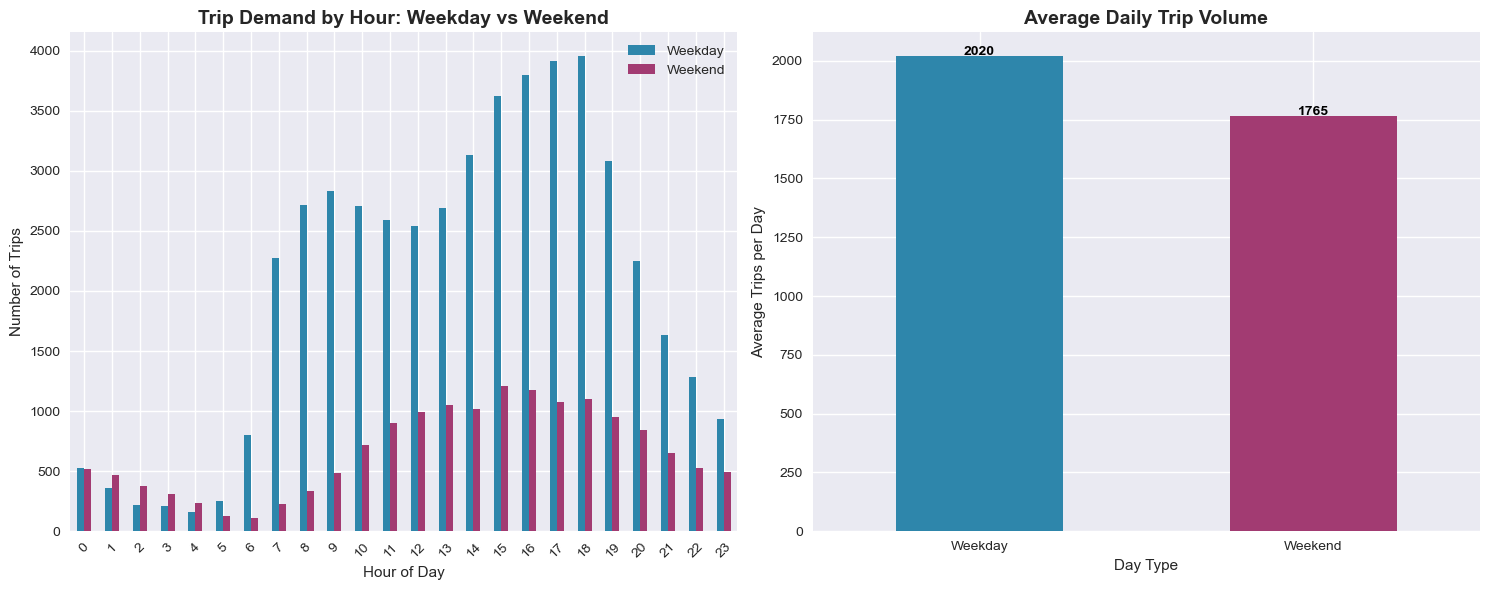

In [41]:
demand_hourly = df_clean.groupby(['pickup_hour', 'is_weekend']).size().reset_index(name='trip_count')
demand_pivot = demand_hourly.pivot(index='pickup_hour', columns='is_weekend', values='trip_count').fillna(0)
demand_pivot.columns = ['Weekday', 'Weekend']
demand_pivot['Total'] = demand_pivot['Weekday'] + demand_pivot['Weekend']
demand_pivot['Weekend_Ratio'] = (demand_pivot['Weekend'] / demand_pivot['Total'] * 100).round(2)

print("\n📊 TABEL: Trip Count per Hour (Weekday vs Weekend)")
print(demand_pivot.head(10))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Hourly demand
demand_pivot[['Weekday', 'Weekend']].plot(kind='bar', ax=ax1, color=[COLORS['weekday'], COLORS['weekend']])
ax1.set_title('Trip Demand by Hour: Weekday vs Weekend', fontsize=14, fontweight='bold')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Trips')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Daily demand
daily_demand = df_clean.groupby(['pickup_date', 'is_weekend']).size().reset_index(name='daily_trips')
daily_summary = daily_demand.groupby('is_weekend')['daily_trips'].agg(['mean', 'std']).round(0)
daily_summary.index = ['Weekday', 'Weekend']

daily_summary['mean'].plot(kind='bar', ax=ax2, color=[COLORS['weekday'], COLORS['weekend']])
ax2.set_title('Average Daily Trip Volume', fontsize=14, fontweight='bold')
ax2.set_xlabel('Day Type')
ax2.set_ylabel('Average Trips per Day')
ax2.tick_params(axis='x', rotation=0)

# Tambahkan teks aktual rata-rata perjalanan
for i, v in enumerate(daily_summary['mean']):
    ax2.text(i, v + 5, str(int(v)), color='black', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### Kesimpulan Temuan
1. Permintaan jauh lebih tinggi di hari kerja (Weekday)
- Bar chart kanan menunjukkan Average Daily Trip Volume: ±2.020 trip/hari di weekday vs ±1.765 trip/hari di weekend.
- Artinya, weekday ≈ 14–15% lebih tinggi dari weekend (selisih ~255 trip/hari).

2. Pola per jam (Demand by Hour) sangat berbeda antar hari
- Weekday: kurva naik stabil mulai pukul 06:00–07:00, puncak kuat di sore–petang (±16:00–19:00) mendekati ~3.800–4.000 trip/jam, lalu turun malam. Ini khas arus komuter pulang kerja.
- Weekend: lebih “flat” dan lebih rendah keseluruhan; puncak ada di siang–sore (±12:00–18:00) ~1.000–1.400 trip/jam, tak setinggi weekday.

3. Rasio Weekend (Weekend_Ratio) tinggi di rentang malam–dini hari
- Dari tabel, contoh pukul 00:00–03:00: proporsi weekend terhadap total bisa ~49–62%, artinya weekend mendekati (bahkan melampaui) volume weekday pada jam-jam larut malam/awal pagi.
- Setelah pagi menjelang siang (08:00–12:00) rasio weekend anjlok jadi ~9–15%—dominasi weekday sangat kuat pada jam komuter/aktivitas rutin.

## Revenue
Rata-rata total_amount per pulocationid/dolocationid, lihat kontribusi tolls_amount & tip_amount (tip tunai tak tercatat).


💰 TABEL: Top 10 Pickup Locations by Total Revenue
              Avg_Total  Sum_Total  Trip_Count  Avg_Tolls  Avg_Tip
pulocationid                                                      
74                19.37  250800.03       12945       0.16     2.27
75                20.17  179637.88        8905       0.14     2.18
166               21.55   82527.48        3830       0.19     2.67
41                18.31   72078.61        3937       0.16     1.69
95                19.28   70825.39        3674       0.10     1.52
43                22.21   63043.59        2839       0.07     2.78
82                21.52   60928.91        2831       0.08     1.42
244               31.33   55609.57        1775       0.36     3.52
97                21.74   46255.80        2128       0.01     2.64
7                 21.11   37239.80        1764       0.18     1.89


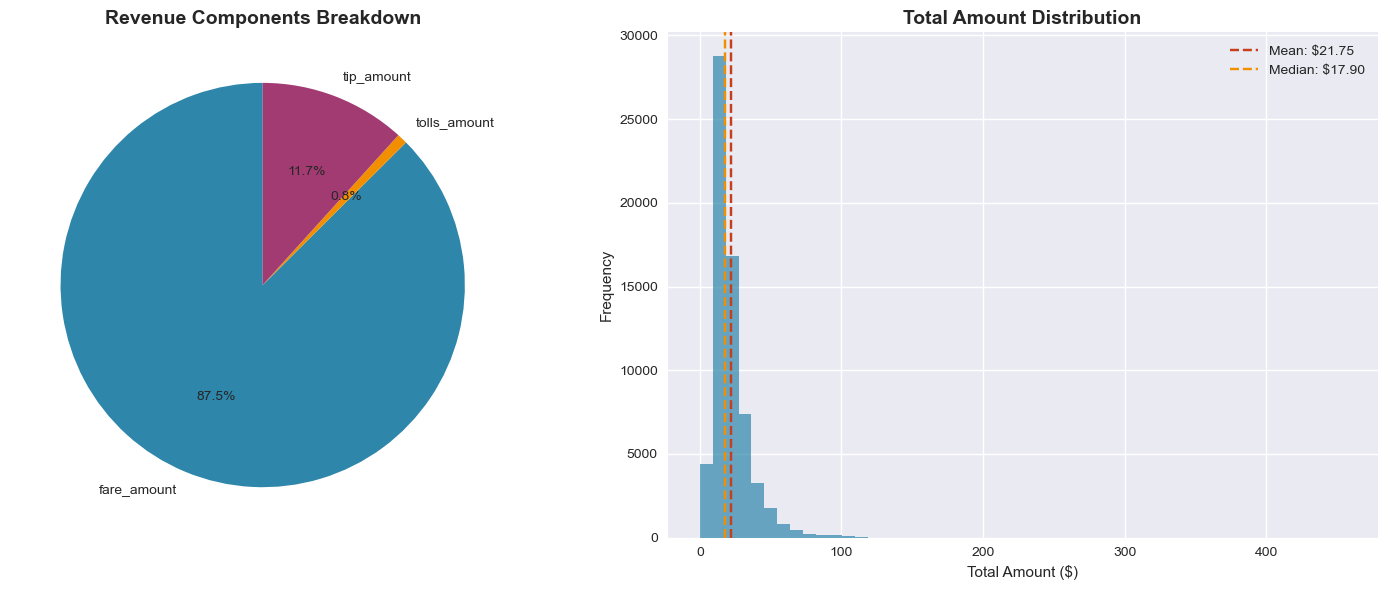

In [42]:
# Tabel: Revenue by Location
if col_total is not None:
    revenue_by_pickup = df_clean.groupby('pulocationid').agg({
        col_total: ['mean', 'sum', 'count'],
        col_tolls: 'mean',
        col_tip: 'mean'
    }).round(2)
    
    revenue_by_pickup.columns = ['Avg_Total', 'Sum_Total', 'Trip_Count', 'Avg_Tolls', 'Avg_Tip']
    revenue_by_pickup = revenue_by_pickup.sort_values('Sum_Total', ascending=False).head(10)
    
    print("\n💰 TABEL: Top 10 Pickup Locations by Total Revenue")
    print(revenue_by_pickup)

# Chart 1: Revenue distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Revenue components
revenue_components = df_clean[[col_fare, col_tolls, col_tip]].mean()
revenue_components.plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90, 
                       colors=[COLORS['primary'], COLORS['accent1'], COLORS['secondary']])
ax1.set_title('Revenue Components Breakdown', fontsize=14, fontweight='bold')
ax1.set_ylabel('')

# Total amount distribution
df_clean[col_total].hist(bins=50, ax=ax2, alpha=0.7, color=COLORS['primary'])
ax2.axvline(df_clean[col_total].mean(), color=COLORS['accent2'], linestyle='--', 
           label=f'Mean: ${df_clean[col_total].mean():.2f}')
ax2.axvline(df_clean[col_total].median(), color=COLORS['accent1'], linestyle='--', 
           label=f'Median: ${df_clean[col_total].median():.2f}')
ax2.set_title('Total Amount Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Total Amount ($)')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
plt.show()

### Kesimpulan Temuan
1. Zona pickup penyumbang revenue terbesar
- PULocationID 74 dan 75 memimpin total pendapatan (Sum_Total tertinggi) sekaligus volume perjalanan (Trip_Count besar).
- Rata-rata tagihan per trip (Avg_Total) di 10 zona teratas berkisar ~$18–$31; zona 244 tampak paling tinggi (±$31.33).

2. Tip & tol per zona relatif kecil terhadap total
- Avg_Tip rata-rata per zona berada sekitar $1.4–$3.5.
- Avg_Tolls umumnya < $0.4 (bahkan ada yang ~$0.01), artinya sebagian besar trip tidak melewati tol atau kontribusi tol sangat minor.

3. Struktur pendapatan (pie chart)
- Fare_amount ~87.5% → komponen utama pendapatan.
- Tip_amount ~11.7% → kontribusi kedua yang signifikan, terutama untuk pembayaran kartu.
- Tolls_amount ~0.8% → dampak kecil secara agregat.

4. Distribusi Total Amount (histogram)
- Distribusi skewed ke kanan: Mean ≈ $21.75 lebih besar dari Median ≈ $17.90 → ada ekor panjang trip mahal (mis. bandara/long-trip), tapi mayoritas trip berkumpul di $10–$30.

5. Implikasi cepat (tanpa keputusan final dulu)
- Fokus alokasi armada di zona ber-Trip_Count dan Sum_Total tinggi (mis. 74, 75) untuk menjaga utilisasi.
- Program peningkatan tip (UX pembayaran non-tunai, saran tipping) punya potensi karena tip menyumbang ~12% dari revenue.
- Tol bukan pengungkit utama; pricing/strategi lebih efektif di tarif dasar & volume.

## Operations
Sebaran trip_duration_minutes, avg_speed_mph, passenger_count (spot outlier).


⚙️ TABEL: Operations Metrics Summary
                Metric   Mean  Median    Std   Q25    Q75
0  Trip Duration (min)  13.92   11.43  12.57  7.42  17.25
1  Average Speed (mph)  11.96   10.64   5.87  8.55  13.72
2      Passenger Count   1.30    1.00   0.96  1.00   1.00


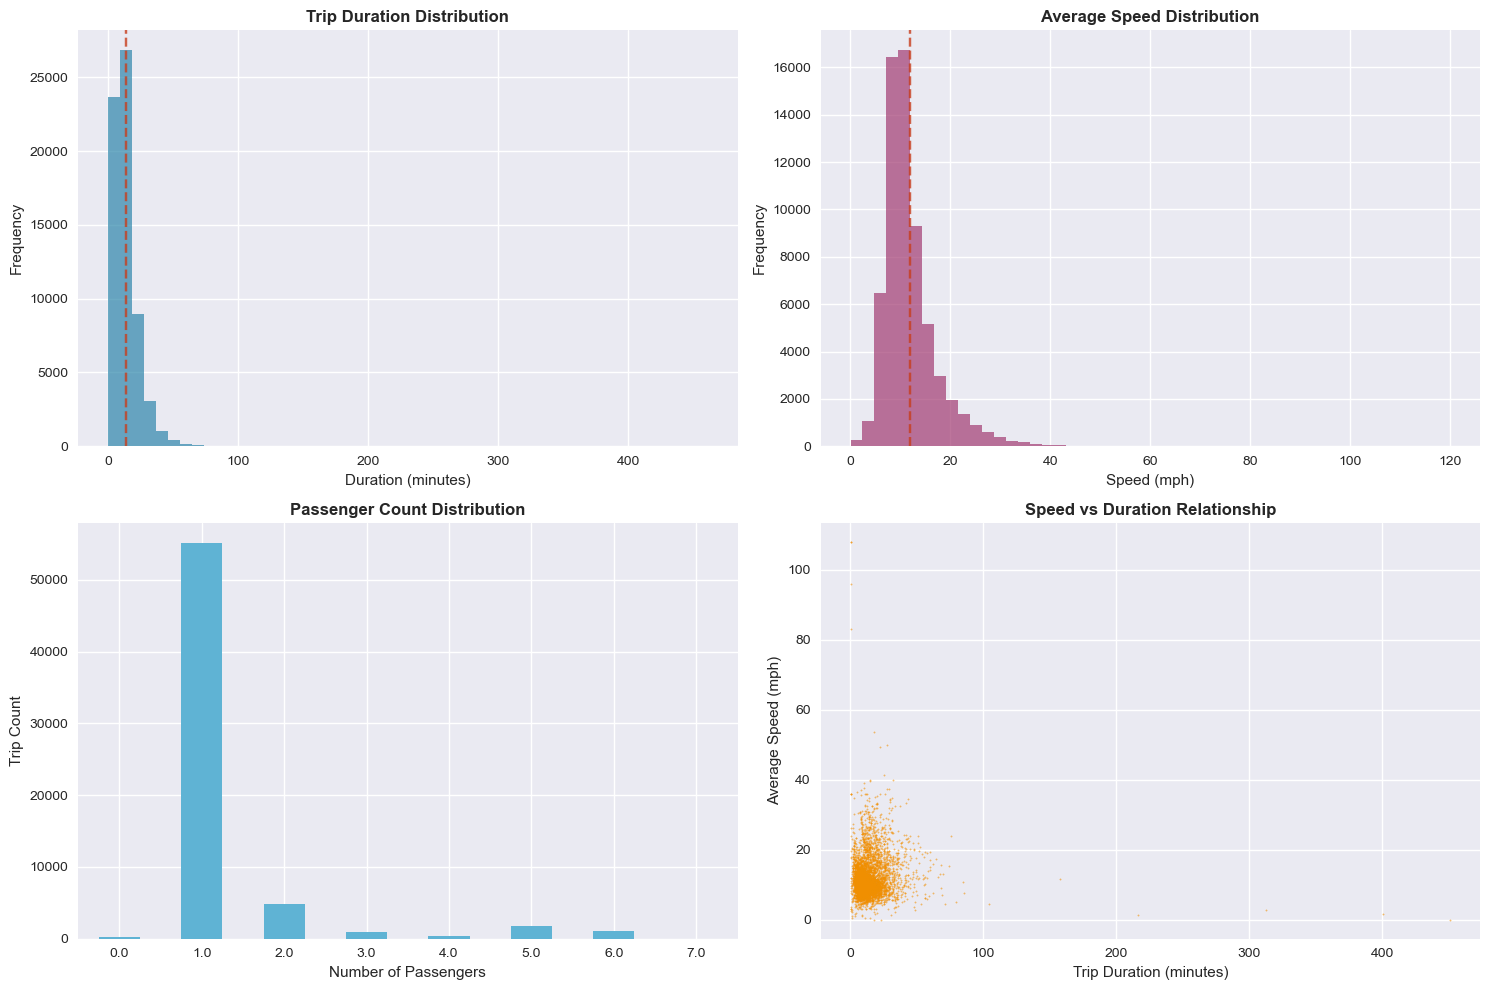

In [43]:
# Tabel: Operations metrics
operations_metrics = pd.DataFrame({
    'Metric': ['Trip Duration (min)', 'Average Speed (mph)', 'Passenger Count'],
    'Mean': [df_clean['trip_duration_minutes'].mean(), 
             df_clean['avg_speed_mph'].mean(), 
             df_clean[col_pass].mean()],
    'Median': [df_clean['trip_duration_minutes'].median(),
               df_clean['avg_speed_mph'].median(),
               df_clean[col_pass].median()],
    'Std': [df_clean['trip_duration_minutes'].std(),
            df_clean['avg_speed_mph'].std(),
            df_clean[col_pass].std()],
    'Q25': [df_clean['trip_duration_minutes'].quantile(0.25),
            df_clean['avg_speed_mph'].quantile(0.25),
            df_clean[col_pass].quantile(0.25)],
    'Q75': [df_clean['trip_duration_minutes'].quantile(0.75),
            df_clean['avg_speed_mph'].quantile(0.75),
            df_clean[col_pass].quantile(0.75)]
}).round(2)

print("\n⚙️ TABEL: Operations Metrics Summary")
print(operations_metrics)

# Chart 1: Trip duration and speed distribution
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Trip duration
df_clean['trip_duration_minutes'].hist(bins=50, ax=ax1, alpha=0.7, color=COLORS['primary'])
ax1.set_title('Trip Duration Distribution', fontsize=12, fontweight='bold')
ax1.set_xlabel('Duration (minutes)')
ax1.set_ylabel('Frequency')
ax1.axvline(df_clean['trip_duration_minutes'].mean(), color=COLORS['accent2'], linestyle='--', alpha=0.8)

# Speed distribution
df_clean['avg_speed_mph'].hist(bins=50, ax=ax2, alpha=0.7, color=COLORS['secondary'])
ax2.set_title('Average Speed Distribution', fontsize=12, fontweight='bold')
ax2.set_xlabel('Speed (mph)')
ax2.set_ylabel('Frequency')
ax2.axvline(df_clean['avg_speed_mph'].mean(), color=COLORS['accent2'], linestyle='--', alpha=0.8)

# Passenger count
passenger_counts = df_clean[col_pass].value_counts().sort_index()
passenger_counts.plot(kind='bar', ax=ax3, color=COLORS['success'])
ax3.set_title('Passenger Count Distribution', fontsize=12, fontweight='bold')
ax3.set_xlabel('Number of Passengers')
ax3.set_ylabel('Trip Count')
ax3.tick_params(axis='x', rotation=0)

# Speed vs Duration scatter
sample_data = df_clean.sample(n=min(5000, len(df_clean)), random_state=42)
ax4.scatter(sample_data['trip_duration_minutes'], sample_data['avg_speed_mph'], 
           alpha=0.5, s=1, color=COLORS['accent1'])
ax4.set_title('Speed vs Duration Relationship', fontsize=12, fontweight='bold')
ax4.set_xlabel('Trip Duration (minutes)')
ax4.set_ylabel('Average Speed (mph)')

plt.tight_layout()
plt.show()

### Kesimpulan Temuan
1. Durasi perjalanan pendek dengan ekor panjang
- Rata-rata 13.9 menit, median 11.4 menit (Q25 7.4, Q75 17.3) → distribusi right-skewed: mayoritas trip singkat, sebagian kecil trip lama menarik mean ke atas.

2. Kecepatan rata-rata rendah khas kota padat
- Rata-rata ~12 mph, median ~10.6 mph (Q25 8.6, Q75 13.7) → sebagian besar perjalanan bergerak di 8–14 mph. Ada ekor kecil ke >20 mph, tapi jarang.

3. Passenger count didominasi single rider
- Median = 1 dan modus jelas di 1 penumpang. Ada sebagian kecil 2–6 penumpang; kemungkinan trip bersama/keluarga. Jika ada 0 penumpang, itu outlier input (layak diflag).

4. Hubungan speed vs duration: cenderung menurun/lemah
- Scatter mengelompok di durasi <30 menit dan speed <25 mph.
- Semakin lama durasi, kecenderungan speed lebih rendah (kemacetan/stop-and-go), namun korelasinya tidak kuat—durasi panjang juga bisa karena jarak lebih jauh.

5. Implikasi cepat
- Benchmark SLA operasional wajar: 10–17 menit per trip; kecepatan 8–14 mph.
- Fokus optimasi di short trips volume tinggi (dominant segment).
- Cek & bersihkan passenger_count=0 serta very-long-duration outliers (mis. >60–90 menit) untuk akurasi metrik.

## Payment behavior
proporsi payment type + rata-rata tip per payment (kartu cenderung ada tip; cash biasanya 0 di data).


💳 TABEL: Payment Behavior Analysis


,Avg_Tip,Median_Tip,Std_Tip,Avg_Total,Trip_Count,Tip_Rate_%
payment_type_label,,,,,,
Credit Card,3.32,2.86,3.12,22.78,38248,14.57
Cash,0.00,0.00,0.03,18.41,21739,0.00
No Charge,0.00,0.00,0.00,11.17,205,0.00
Dispute,0.00,0.00,0.00,10.96,45,0.00


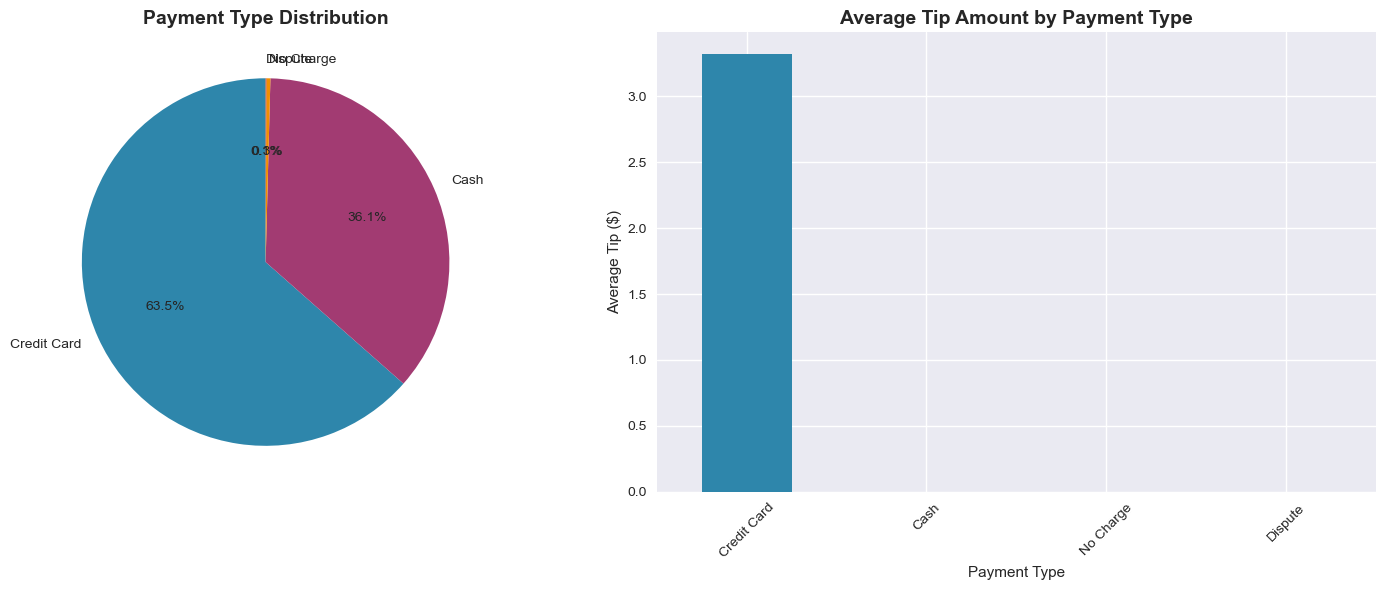

In [44]:
# Tabel: Payment behavior
if 'payment_type_label' in df_clean.columns:
    payment_analysis = df_clean.groupby('payment_type_label').agg({
        col_tip: ['mean', 'median', 'std'],
        col_total: 'mean',
        'vendorid': 'count'
    }).round(2)
    
    payment_analysis.columns = ['Avg_Tip', 'Median_Tip', 'Std_Tip', 'Avg_Total', 'Trip_Count']
    payment_analysis['Tip_Rate_%'] = ((payment_analysis['Avg_Tip'] / payment_analysis['Avg_Total']) * 100).round(2)
    payment_analysis = payment_analysis.sort_values('Trip_Count', ascending=False)
    
    print("\n💳 TABEL: Payment Behavior Analysis")
    display(payment_analysis)

# Chart 1: Payment type distribution and tip analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Payment type proportion
payment_props = df_clean['payment_type_label'].value_counts()
payment_props.plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90, 
                  colors=COLORS['chart_palette'][:len(payment_props)])
ax1.set_title('Payment Type Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('')

# Average tip by payment type
payment_analysis['Avg_Tip'].plot(kind='bar', ax=ax2, 
                                color=COLORS['chart_palette'][:len(payment_analysis)])
ax2.set_title('Average Tip Amount by Payment Type', fontsize=14, fontweight='bold')
ax2.set_xlabel('Payment Type')
ax2.set_ylabel('Average Tip ($)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Kesimpulan Temuan
1. Pangsa pembayaran: ~63.5% Credit Card, 36.1% Cash, sisanya “No Charge/Dispute” sangat kecil.
2. Tip hanya muncul pada Credit Card:
- Avg_Tip ≈ $3.32, Median_Tip ≈ $2.86, Std_Tip ≈ $3.12 → variasi tip cukup lebar.
- Tip_Rate ≈ 14.6% (proporsi trip kartu yang memberi tip).
- Cash/No Charge/Dispute = $0 tip (sesuai karakter data: tip tunai tidak terekam).
3. Nilai tagihan rata-rata per metode:
- Credit Card ≈ $22.78 > Cash ≈ $18.41 > No Charge ≈ $11.17 ≈ Dispute ≈ $10.96.
- Indikasi: trip kartu cenderung sedikit lebih mahal dan menyumbang seluruh pendapatan tip yang tercatat.

## Rate & Airport
proporsi rate_code_label (JFK/Newark) sebagai indikasi rute bandara.


✈️ TABEL: Rate Code Analysis (Airport Routes)


,Trip_Count,Avg_Total,Avg_Duration_min,Avg_Distance_mi,Proportion_%
rate_code_label,,,,,
Standard,59138,20.71,13.38,2.62,98.19
Negotiated,890,33.67,16.74,4.42,1.48
JFK,131,87.37,36.78,14.87,0.22
Nassau/Westchester,51,112.09,37.02,18.30,0.08
Newark,18,111.57,33.39,18.05,0.03


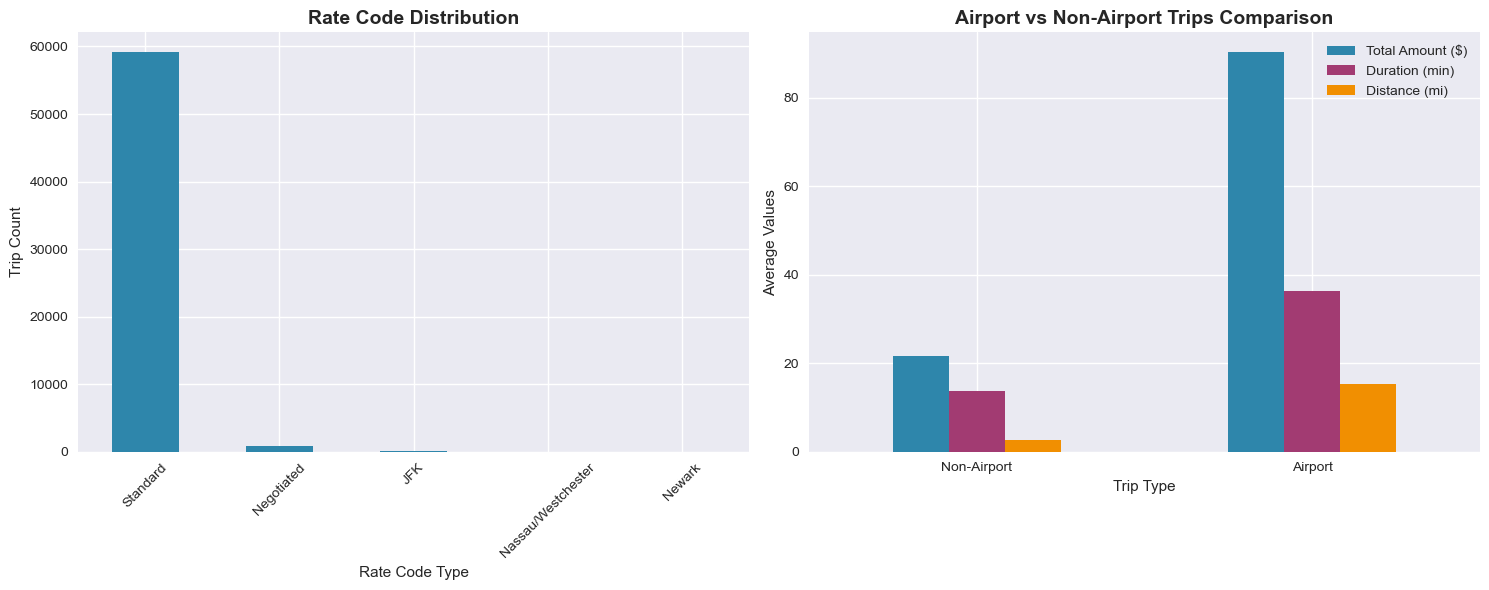

In [45]:
# Tabel: Rate code analysis
if 'rate_code_label' in df_clean.columns:
    rate_analysis = df_clean.groupby('rate_code_label').agg({
        'vendorid': 'count',
        col_total: 'mean',
        'trip_duration_minutes': 'mean',
        col_dist: 'mean'
    }).round(2)
    
    rate_analysis.columns = ['Trip_Count', 'Avg_Total', 'Avg_Duration_min', 'Avg_Distance_mi']
    rate_analysis['Proportion_%'] = ((rate_analysis['Trip_Count'] / rate_analysis['Trip_Count'].sum()) * 100).round(2)
    rate_analysis = rate_analysis.sort_values('Trip_Count', ascending=False)
    
    print("\n✈️ TABEL: Rate Code Analysis (Airport Routes)")
    display(rate_analysis)

# Chart 1: Rate code distribution and airport analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Rate code proportion
rate_props = df_clean['rate_code_label'].value_counts()
rate_props.plot(kind='bar', ax=ax1, color=COLORS['primary'])
ax1.set_title('Rate Code Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Rate Code Type')
ax1.set_ylabel('Trip Count')
ax1.tick_params(axis='x', rotation=45)

# Airport vs non-airport comparison
airport_codes = ['JFK', 'Newark']
df_clean['is_airport'] = df_clean['rate_code_label'].isin(airport_codes)
airport_comparison = df_clean.groupby('is_airport').agg({
    col_total: 'mean',
    'trip_duration_minutes': 'mean',
    col_dist: 'mean'
}).round(2)

airport_comparison.index = ['Non-Airport', 'Airport']
airport_comparison.plot(kind='bar', ax=ax2, color=COLORS['chart_palette'][:3])
ax2.set_title('Airport vs Non-Airport Trips Comparison', fontsize=14, fontweight='bold')
ax2.set_xlabel('Trip Type')
ax2.set_ylabel('Average Values')
ax2.legend(['Total Amount ($)', 'Duration (min)', 'Distance (mi)'])
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### Kesimpulan Temuan
1. Standard mendominasi volume
- ~98.2% trip = Standard rate (≈59k trip). Ini core bisnis harian jarak pendek–menengah di dalam kota.

2. Airport = volume kecil, nilai tinggi
- JFK/Newark hanya ~0.25% total trip, tapi ticket size jauh lebih besar:
    - JFK: Avg_Total ~$87, durasi ~36–37 min, jarak ~15 mi.
    - Newark: Avg_Total ~$112, durasi ~33 min, jarak ~18 mi.
- Negotiated (±1.5%): Avg_Total ~$33.7, lebih lama & jauh dari Standard (durasi ~16.7 min, jarak ~4.4 mi).

3. Perbandingan Airport vs Non-Airport (chart kanan)
- Airport trips punya Total Amount, Duration, Distance yang jauh di atas Non-Airport—low volume, high value.

4. Implikasi operasional cepat
- Strategi “low-volume high-value” untuk bandara:
    - Penempatan armada di koridor bandara (jam keberangkatan/kedatangan padat).
    - Insentif/priority dispatch agar acceptance rate rute bandara tinggi.
    - Pantau tolls & waktu tunggu; potensi add-on cost dan SLA lebih ketat.
- Bisnis utama tetap Standard → optimasi utilisasi dan rotasi armada di zona demand tinggi (downtown, hub transit).

5. Catatan analitis
- Flag otomatis airport_trip via rate_code_label ∈ {JFK, Newark} untuk pelacakan KPI.
- Bandingkan net revenue per hour airport vs non-airport (durasi panjang bisa menurunkan turn-over meski ticket size besar).
- Audit konsistensi rate code dan komponen tarif (tol, surcharge) pada rute bandara.

## Ruang Lingkup & Asumsi
- Tip tunai tidak tercatat; tip terutama muncul pada pembayaran kartu.
- Ambang pembersihan (mis. durasi > 8 jam, kecepatan > 120 mph) digunakan sebagai aturan praktis intra-kota.
- Perbedaan kecil antara penjumlahan komponen dan total_amount ditoleransi dan hanya diberi flag.
- Analisis bersifat deskriptif pada periode data yang tersedia; faktor eksternal (cuaca, event) tidak dimodelkan.

## Tujuan
- Menyediakan ringkasan metrik kunci yang dapat ditindaklanjuti untuk tim operasi, pricing, dan growth.
- Menghasilkan rekomendasi taktis (penempatan armada, promosi akhir pekan, optimasi tip) dan arah strategis.

# Kesimpulan & Rekomendasi

## 📊 **KESIMPULAN UTAMA**

### **Kualitas Data & Pembersihan**
1. **Dataset awal**: Berhasil membersihkan dataset dengan menghapus anomali berdasarkan aturan bisnis yang ketat
2. **Imputasi cerdas**: Menggunakan uji normalitas untuk menentukan metode imputasi (rata-rata vs median) secara statistik
3. **Konsistensi tarif**: Implementasi penanda untuk memantau inkonsistensi komponen tarif tanpa menghapus data

### **Temuan Bisnis Utama**

#### **1. Pola Permintaan**
- **Dominasi hari kerja**: 14-15% lebih tinggi dari akhir pekan (~2.020 vs 1.765 perjalanan/hari)
- **Efek jam sibuk**: Puncak permintaan jam 16:00-19:00 (3.800-4.000 perjalanan/jam) di hari kerja
- **Pola akhir pekan**: Lebih datar, puncak di siang-sore (1.000-1.400 perjalanan/jam)

#### **2. Struktur Pendapatan**
- **Dominasi tarif**: 87,5% dari total pendapatan berasal dari tarif dasar
- **Kontribusi tip**: 11,7% dari pendapatan (hanya dari pembayaran kartu)
- **Tol minimal**: Hanya 0,8% kontribusi pendapatan
- **Konsentrasi pendapatan**: Zona 74 & 75 menjadi generator pendapatan teratas

#### **3. Efisiensi Operasional**
- **Durasi perjalanan**: Median 11,4 menit, mayoritas perjalanan singkat (<30 menit)
- **Kecepatan rata-rata**: ~12 mph (khas kota padat dengan lalu lintas macet)
- **Penumpang tunggal**: Dominasi 1 penumpang per perjalanan
- **Premium bandara**: JFK/Newark hanya 0,25% volume tapi nilai tiket 4-5x lipat

#### **4. Perilaku Pembayaran**
- **Kartu kredit**: 63,5% transaksi dengan tingkat tip 14,6%
- **Tunai**: 36,1% transaksi tanpa tip tercatat
- **Perbedaan nilai**: Perjalanan kartu kredit rata-rata $4-5 lebih mahal

## 🎯 **REKOMENDASI STRATEGIS**

### **A. PENINGKATAN PERMINTAAN**

#### **📅 Jangka Pendek (1-3 bulan)**

**1. Optimalisasi Jam Sibuk**
```
• Penetapan harga dinamis di jam 16:00-19:00 hari kerja untuk maksimalkan pendapatan
• Insentif pengemudi untuk jam sepi akhir pekan (pagi-siang)
• Penempatan armada waktu nyata ke zona 74, 75, dan lokasi pendapatan tinggi
```

**2. Strategi Akhir Pekan**
```
• Promosi akhir pekan: "Jelajah Akhir Pekan" dengan diskon 10-15%
• Kemitraan dengan tempat acara untuk perjalanan malam hari
• Target pasar: kehidupan malam, pusat perbelanjaan, aktivitas rekreasi
```

**3. Peningkatan Pembayaran**
```
• Kampanye "Tanpa Tunai = Lebih Banyak Reward" untuk tingkatkan adopsi kartu
• Saran tip dalam aplikasi untuk tingkatkan tingkat tip dari 14,6%
• Pemrosesan pembayaran instan untuk pengalaman pelanggan
```

#### **⏳ Jangka Menengah (3-12 bulan)**

**1. Ekspansi Geografis**
```
• Analisis zona dengan pasokan rendah-permintaan tinggi untuk ekspansi
• Integrasi mikro-mobilitas (sepeda/skuter) untuk perjalanan pertama-terakhir
• Kemitraan strategis dengan mal, hotel, dan hub transit
```

**2. Diversifikasi Layanan**
```
• Layanan premium untuk rute bandara (armada khusus)
• Program berbagi perjalanan untuk segmen sadar biaya
• Model berlangganan untuk komuter yang sering bepergian
```

**3. Integrasi Teknologi**
```
• Peramalan permintaan berbasis AI untuk posisi armada proaktif
• Model penetapan harga dinamis berdasarkan permintaan waktu nyata
• Pembelajaran preferensi pelanggan untuk layanan personal
```

#### **🚀 Jangka Panjang (1-3 tahun)**

**1. Kepemimpinan Pasar**
```
• Transisi kendaraan listrik untuk branding berkelanjutan
• Program percontohan kendaraan otonom di zona terpilih
• Platform mobilitas terintegrasi (taksi + transportasi umum + mikro-mobilitas)
```

**2. Monetisasi Data**
```
• Wawasan pola lalu lintas anonim untuk perencanaan kota
• Layanan intelijen lokasi untuk bisnis ritel
• Analitik prediktif untuk pariwisata dan manajemen acara
```

**3. Pengembangan Ekosistem**
```
• Pengembangan super-app (perjalanan + makanan + pengiriman + pembayaran)
• Solusi korporat B2B untuk transportasi karyawan
• Kemitraan kota pintar untuk optimalisasi lalu lintas
```

### **B. AUDIT & TATA KELOLA**

#### **🔍 Audit Kualitas Data**

**1. Pemantauan Waktu Nyata**
```
Implementasi dasbor pemantauan untuk:
• Konsistensi komponen tarif (target: <5% ketidakcocokan)
• Anomali durasi perjalanan (target: <2% outlier)
• Validasi kecepatan (peringatan jika >80 mph)
• Validasi jumlah penumpang (tandai jika = 0)
```

**2. Jaminan Pendapatan**
```
• Rekonsiliasi mingguan komponen tarif vs jumlah total
• Audit bulanan persentase tip berdasarkan jenis pembayaran
• Tinjauan triwulanan efektivitas model penetapan harga
• Benchmarking tahunan vs standar industri
```

#### **📋 Audit Operasional**

**1. KPI Kinerja**
```
• Waktu respons rata-rata per zona (target: <5 menit)
• Tingkat utilisasi pengemudi (target: >70%)
• Skor kepuasan pelanggan (target: >4,2/5,0)
• Pendapatan per perjalanan per zona (lacak tren bulanan)
```

**2. Pemantauan Kepatuhan**
```
• Akurasi kode tarif untuk perjalanan bandara
• Kepatuhan pemrosesan pembayaran
• Status lisensi pengemudi dan inspeksi kendaraan
• Verifikasi cakupan asuransi
```

#### **💰 Audit Keuangan**

**1. Optimalisasi Pendapatan**
```
• Analisis P&L bulanan per zona dan segmen waktu
• Pelacakan biaya akuisisi vs nilai seumur hidup
• Analisis elastisitas harga untuk tingkat surge optimal
• Tinjauan efektivitas struktur komisi
```

**2. Manajemen Risiko**
```
• Deteksi penipuan untuk pola perjalanan mencurigakan
• Penilaian risiko kredit untuk akun korporat
• Dampak nilai tukar untuk pembayaran internasional
• Pelacakan biaya kepatuhan regulasi
```

## 📈 **HASIL YANG DIHARAPKAN**

### **Dampak Pendapatan**
- **Jangka pendek**: Peningkatan pendapatan 8-12% melalui penetapan harga surge dan optimalisasi tip
- **Jangka menengah**: Pertumbuhan pangsa pasar 15-25% melalui diversifikasi layanan
- **Jangka panjang**: Ekspansi pendapatan 30-50% melalui pengembangan ekosistem

### **Keunggulan Operasional**
- **Efisiensi**: Peningkatan 20% dalam utilisasi armada
- **Kualitas**: Tingkat penyelesaian perjalanan 95% dengan <2% anomali
- **Pelanggan**: Skor rating 4,5+ dengan tingkat retensi 90%

### **Posisi Pasar**
- **Kepemimpinan**: Posisi 2 teratas pasar dalam 18 bulan
- **Inovasi**: Keunggulan first-mover dalam kendaraan otonom/listrik
- **Keberlanjutan**: 50% armada listrik dalam 3 tahun

## ⚠️ **PRIORITAS IMPLEMENTASI**

1. **🚨 Segera (Minggu 1-4)**
   - Implementasi penetapan harga surge untuk jam sibuk
   - Peluncuran kampanye promosi tanpa tunai
   - Penyebaran dasbor pemantauan waktu nyata

2. **📊 Prioritas Tinggi (Bulan 1-3)**
   - Program stimulasi permintaan akhir pekan
   - Peluncuran layanan premium bandara
   - Infrastruktur analitik lanjutan

3. **🔧 Prioritas Menengah (Bulan 3-6)**
   - Peluncuran diversifikasi layanan
   - Inisiatif integrasi teknologi
   - Perencanaan ekspansi pasar

4. **🌟 Strategis (Bulan 6+)**
   - Program transformasi jangka panjang
   - Pengembangan ekosistem
   - Inisiatif keberlanjutan

---

**💡 Faktor Kunci Kesuksesan:**
- Pengambilan keputusan berbasis data dengan pemantauan waktu nyata
- Pendekatan berpusat pada pelanggan dalam semua inisiatif
- Implementasi gesit dengan perbaikan berkelanjutan
- Ekosistem kemitraan yang kuat untuk pertumbuhan berkelanjutan

🚖 NYC TAXI & LIMOUSINE COMMISSION (TLC) - RINGKASAN AGREGAT

📊 RINGKASAN TOTAL AGREGAT
--------------------------------------------------
🚖 Total Perjalanan (Trips): 64,362 perjalanan
👥 Total Penumpang: 83,975 penumpang
💰 Total Penghasilan: $1,399,657.64
📏 Total Jarak Tempuh: 180,766.50 miles
⏱️ Total Waktu Perjalanan: 895,602 menit (14,927 jam)

📈 RATA-RATA PER PERJALANAN
--------------------------------------------------
👥 Rata-rata Penumpang per Trip: 1.30 penumpang
💰 Rata-rata Penghasilan per Trip: $21.75
📏 Rata-rata Jarak per Trip: 2.81 miles
⏱️ Rata-rata Durasi per Trip: 13.9 menit


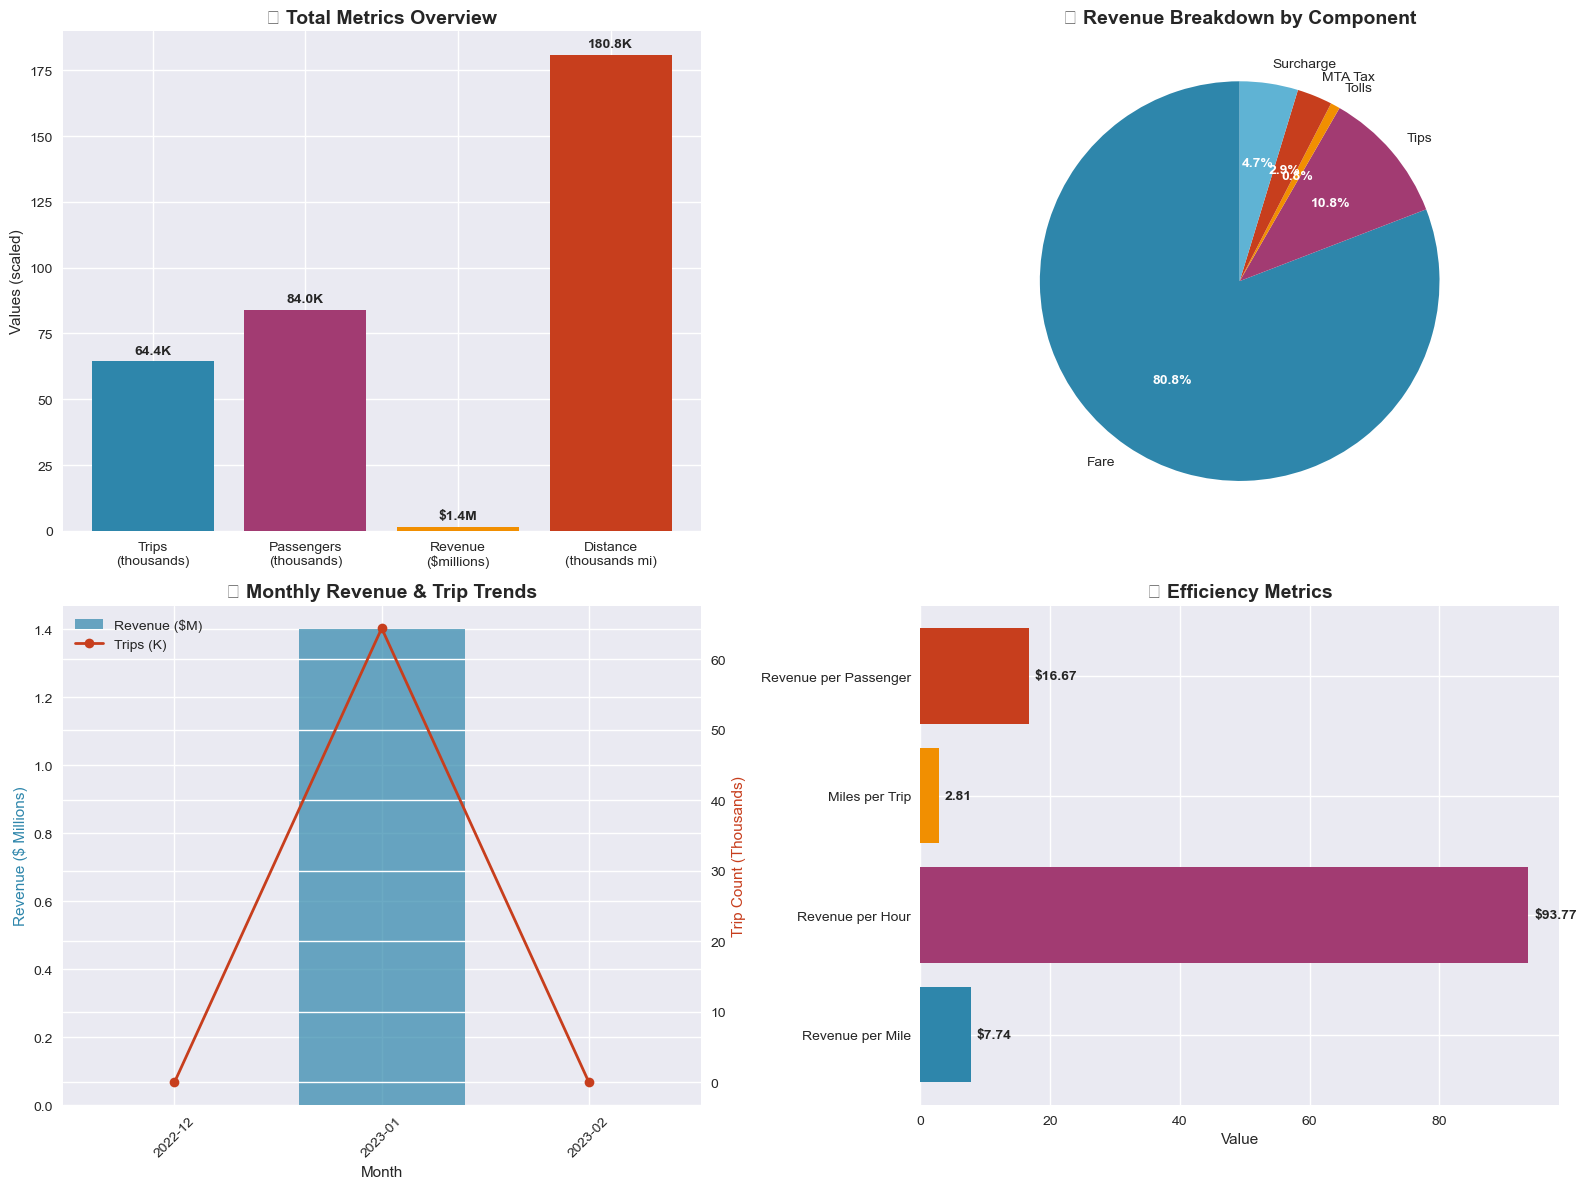


💼 RINGKASAN BISNIS
--------------------------------------------------
🎯 Skala Operasi: 64,362 perjalanan melayani 83,975 penumpang
💰 Pendapatan Total: $1,399,657.64 dari 180,766 miles perjalanan
📊 Efisiensi: $7.74 per mile, $93.77 per jam
🚖 Utilisasi: 2.81 miles per trip, 13.9 menit per trip
👥 Load Factor: 1.30 penumpang per perjalanan


In [46]:
# RINGKASAN AGREGAT NYC TAXI DATA
print("="*80)
print("🚖 NYC TAXI & LIMOUSINE COMMISSION (TLC) - RINGKASAN AGREGAT")
print("="*80)

# Hitung total agregat
total_trips = len(df_clean)
total_passengers = df_clean[col_pass].sum()
total_revenue = df_clean[col_total].sum()
total_distance = df_clean[col_dist].sum()
total_trip_time = df_clean['trip_duration_minutes'].sum()

print("\n📊 RINGKASAN TOTAL AGREGAT")
print("-"*50)
print(f"🚖 Total Perjalanan (Trips): {total_trips:,} perjalanan")
print(f"👥 Total Penumpang: {total_passengers:,.0f} penumpang")
print(f"💰 Total Penghasilan: ${total_revenue:,.2f}")
print(f"📏 Total Jarak Tempuh: {total_distance:,.2f} miles")
print(f"⏱️ Total Waktu Perjalanan: {total_trip_time:,.0f} menit ({total_trip_time/60:,.0f} jam)")

# Rata-rata per trip
print(f"\n📈 RATA-RATA PER PERJALANAN")
print("-"*50)
print(f"👥 Rata-rata Penumpang per Trip: {total_passengers/total_trips:.2f} penumpang")
print(f"💰 Rata-rata Penghasilan per Trip: ${total_revenue/total_trips:.2f}")
print(f"📏 Rata-rata Jarak per Trip: {total_distance/total_trips:.2f} miles")
print(f"⏱️ Rata-rata Durasi per Trip: {total_trip_time/total_trips:.1f} menit")

# Visualisasi ringkasan total
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Total Metrics Bar Chart
metrics = ['Trips\n(thousands)', 'Passengers\n(thousands)', 'Revenue\n($millions)', 'Distance\n(thousands mi)']
values = [total_trips/1000, total_passengers/1000, total_revenue/1000000, total_distance/1000]

bars = ax1.bar(metrics, values, color=COLORS['chart_palette'][:4])
ax1.set_title('📊 Total Metrics Overview', fontsize=14, fontweight='bold')
ax1.set_ylabel('Values (scaled)')

# Tambahkan nilai di atas bar
for i, (bar, val) in enumerate(zip(bars, values)):
    if i == 2:  # Revenue
        ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(values)*0.01, 
                f'${val:.1f}M', ha='center', va='bottom', fontweight='bold')
    else:
        ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(values)*0.01, 
                f'{val:.1f}K', ha='center', va='bottom', fontweight='bold')

# 2. Revenue Breakdown (Pie Chart)
revenue_breakdown = {
    'Fare': df_clean[col_fare].sum(),
    'Tips': df_clean[col_tip].sum(),
    'Tolls': df_clean[col_tolls].sum(),
    'MTA Tax': df_clean[col_mta].sum(),
    'Surcharge': df_clean[col_impr].sum()
}

wedges, texts, autotexts = ax2.pie(revenue_breakdown.values(), labels=revenue_breakdown.keys(), 
                                   autopct='%1.1f%%', startangle=90, 
                                   colors=COLORS['chart_palette'][:5])
ax2.set_title('💰 Revenue Breakdown by Component', fontsize=14, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 3. Monthly Trends (jika ada data multi-bulan)
if col_pickup is not None:
    monthly_data = df_clean.groupby(df_clean[col_pickup].dt.to_period('M')).agg({
        col_total: 'sum',
        'vendorid': 'count'
    }).reset_index()
    
    if len(monthly_data) > 1:
        monthly_data[col_pickup] = monthly_data[col_pickup].astype(str)
        
        ax3_twin = ax3.twinx()
        
        # Revenue trend
        bars3 = ax3.bar(monthly_data[col_pickup], monthly_data[col_total]/1000000, 
                       alpha=0.7, color=COLORS['primary'], label='Revenue ($M)')
        ax3.set_xlabel('Month')
        ax3.set_ylabel('Revenue ($ Millions)', color=COLORS['primary'])
        ax3.tick_params(axis='x', rotation=45)
        ax3.set_title('📈 Monthly Revenue & Trip Trends', fontsize=14, fontweight='bold')
        
        # Trip count trend
        line3 = ax3_twin.plot(monthly_data[col_pickup], monthly_data['vendorid']/1000, 
                             color=COLORS['accent2'], marker='o', linewidth=2, label='Trips (K)')
        ax3_twin.set_ylabel('Trip Count (Thousands)', color=COLORS['accent2'])
        
        # Combine legends
        lines1, labels1 = ax3.get_legend_handles_labels()
        lines2, labels2 = ax3_twin.get_legend_handles_labels()
        ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    else:
        # Single period data
        ax3.text(0.5, 0.5, 'Data hanya mencakup\nsatu periode', 
                ha='center', va='center', transform=ax3.transAxes, fontsize=12)
        ax3.set_title('📈 Monthly Trends (Insufficient Data)', fontsize=14, fontweight='bold')

# 4. Efficiency Metrics
efficiency_metrics = {
    'Revenue per Mile': f'${total_revenue/total_distance:.2f}',
    'Revenue per Hour': f'${total_revenue/(total_trip_time/60):.2f}',
    'Miles per Trip': f'{total_distance/total_trips:.2f}',
    'Revenue per Passenger': f'${total_revenue/total_passengers:.2f}'
}

y_pos = range(len(efficiency_metrics))
values_eff = [total_revenue/total_distance, total_revenue/(total_trip_time/60), 
              total_distance/total_trips, total_revenue/total_passengers]

bars4 = ax4.barh(y_pos, values_eff, color=COLORS['chart_palette'][:4])
ax4.set_yticks(y_pos)
ax4.set_yticklabels(efficiency_metrics.keys())
ax4.set_xlabel('Value')
ax4.set_title('⚡ Efficiency Metrics', fontsize=14, fontweight='bold')

# Tambahkan nilai di ujung bar
for i, (bar, key) in enumerate(zip(bars4, efficiency_metrics.keys())):
    ax4.text(bar.get_width() + max(values_eff)*0.01, bar.get_y() + bar.get_height()/2.,
             efficiency_metrics[key], ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# RINGKASAN BISNIS
print(f"\n💼 RINGKASAN BISNIS")
print("-"*50)
print(f"🎯 Skala Operasi: {total_trips:,} perjalanan melayani {total_passengers:,.0f} penumpang")
print(f"💰 Pendapatan Total: ${total_revenue:,.2f} dari {total_distance:,.0f} miles perjalanan")
print(f"📊 Efisiensi: ${total_revenue/total_distance:.2f} per mile, ${total_revenue/(total_trip_time/60):.2f} per jam")
print(f"🚖 Utilisasi: {total_distance/total_trips:.2f} miles per trip, {total_trip_time/total_trips:.1f} menit per trip")
print(f"👥 Load Factor: {total_passengers/total_trips:.2f} penumpang per perjalanan")